In [15]:
#!pip install tensorflow_hub
#!pip install transformers
#!pip install --upgrade tensorflow-hub
from transformers import BertTokenizer, BertModel
import tensorflow_hub as hub
# 加载模型

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
#model = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")
print ("module %s loaded" % module_url)



module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [226]:

#folder_path = "C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_a_grecia_publico/SBERT/"
import os
import torch
#os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb=10'
from nltk.corpus import stopwords
import gc
Vec = []
count = 0
CON = []


for count in range(0,67):
    
    # READ article file
    article_path = "C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_25_de_abril_publico/doc/" + str(count) + ".txt"
    file = open(article_path, 'r', encoding='utf-8')
    content = file.read()
    content = content.replace("\n", " ")
    CON.append(content)
    file.close()
    count = count + 1
    
    
# process by SBERT model
outputs = model(CON)



In [227]:
import numpy
print(len(outputs))
outputs = numpy.array(outputs)
print(type(outputs))
print(outputs.shape)
print(outputs)

67
<class 'numpy.ndarray'>
(67, 512)
[[-0.05103007 -0.0354083  -0.04400484 ...  0.06518175 -0.04727732
  -0.06521145]
 [ 0.02266826  0.01368557 -0.02627646 ...  0.06467165 -0.00466325
  -0.0646777 ]
 [-0.04227672  0.01859396 -0.02096764 ...  0.06144354 -0.05205688
  -0.06155482]
 ...
 [-0.01161882  0.01199497 -0.05013431 ...  0.0577615  -0.01380557
  -0.06641843]
 [-0.03939731 -0.00056487 -0.00268506 ...  0.0558146  -0.04791026
  -0.05581476]
 [-0.05040838  0.03028385 -0.02723645 ...  0.05788875 -0.04944053
  -0.05788876]]


In [228]:
# TEST
#import markov_clustering as mc
#import numpy as np
#from sklearn.metrics.pairwise import cosine_similarity
#for t in np.arange(0.8, 1.5, 0.1):  # 从0.5到0.9，步长为0.05
#    similarity_matrix = cosine_similarity(outputs)
#    binary_sim_matrix = np.where(similarity_matrix >= t, 1, 0)
#    result = mc.run_mcl(binary_sim_matrix)
#    clusters = mc.get_clusters(result)
#    Q = mc.modularity(matrix=result, clusters=clusters)
#    print("阈值:", t, "modularity:", Q)    

In [229]:
# Extract data from TLS DATASET
import os
folder_path = "C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_25_de_abril_publico/input_docs"
import os

dct = []    # 用于存储文件名的列表

# 遍历当前目录的所有子目录
for subdir in os.listdir(folder_path):
    subdir_path = os.path.join(folder_path, subdir)
    # 如果是文件夹，则进一步遍历其下的文件
    if os.path.isdir(subdir_path):
        for file_name in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file_name)
            # 确保是文件而不是文件夹
            if os.path.isfile(file_path):
                # 打开文件并读取内容
                with open(file_path, 'r', encoding='utf-8') as file:
                    dct.append(file_name[0:10])

print(len(dct))

67


In [230]:
from datetime import datetime, timedelta
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
similarity_matrix = cosine_similarity(outputs)
distance_matrix = 1 - similarity_matrix
np.fill_diagonal(distance_matrix, 0)

# 设置你想要的距离值
large_distance = 100

for i in range(len(dct)-1):
    date_str1 = dct[i]
    date_str2 = dct[i+1]
    time1 = datetime.strptime(date_str1, "%Y-%m-%d")
    time2 = datetime.strptime(date_str2, "%Y-%m-%d")
    time_difference = abs(time2 - time1)   
    
    # 在距离矩阵中为这两篇文章设置距离
    if time_difference > timedelta(days=1) :
        distance_matrix[i][i+1] = large_distance
        distance_matrix[i+1][i] = large_distance



In [231]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import markov_clustering as mc
for inflation in [i / 10 for i in range(11, 25)]:
    result = mc.run_mcl(distance_matrix, inflation=inflation)
    clusters = mc.get_clusters(result)
    Q = mc.modularity(matrix=result, clusters=clusters)
    print("inflation:", inflation, "modularity:", Q)

inflation: 1.1 modularity: 0.0
inflation: 1.2 modularity: 0.5749610182064683
inflation: 1.3 modularity: 0.5771886733040881
inflation: 1.4 modularity: 0.5771886733040881
inflation: 1.5 modularity: 0.5771886733040881
inflation: 1.6 modularity: 0.5869904071537416
inflation: 1.7 modularity: 0.5542437122828925
inflation: 1.8 modularity: 0.5542437122828925
inflation: 1.9 modularity: 0.5542437122828925
inflation: 2.0 modularity: 0.5402094072370387
inflation: 2.1 modularity: 0.5324125690246696
inflation: 2.2 modularity: 0.5038984239991031
inflation: 2.3 modularity: 0.5092448245233564
inflation: 2.4 modularity: 0.5092448245233564


In [233]:
result = mc.run_mcl(distance_matrix, inflation=1.2)
clusters = mc.get_clusters(result)
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")

Cluster 0: (0, 2, 4)
Cluster 1: (1, 3, 5)
Cluster 2: (6, 7, 8, 10, 11, 12, 13, 14, 15, 18, 21, 22, 24, 26, 27, 28, 29, 30, 32, 33, 34, 38, 39, 40, 41, 42, 43, 55, 56)
Cluster 3: (9, 16, 17, 19, 20, 23, 25, 31, 35, 36, 37)
Cluster 4: (44, 46)
Cluster 5: (45, 47)
Cluster 6: (48,)
Cluster 7: (49,)
Cluster 8: (50, 52, 54)
Cluster 9: (51, 53)
Cluster 10: (57,)
Cluster 11: (58,)
Cluster 12: (59, 61, 63, 65)
Cluster 13: (60, 62, 64, 66)


In [234]:
print(clusters)

[(0, 2, 4), (1, 3, 5), (6, 7, 8, 10, 11, 12, 13, 14, 15, 18, 21, 22, 24, 26, 27, 28, 29, 30, 32, 33, 34, 38, 39, 40, 41, 42, 43, 55, 56), (9, 16, 17, 19, 20, 23, 25, 31, 35, 36, 37), (44, 46), (45, 47), (48,), (49,), (50, 52, 54), (51, 53), (57,), (58,), (59, 61, 63, 65), (60, 62, 64, 66)]


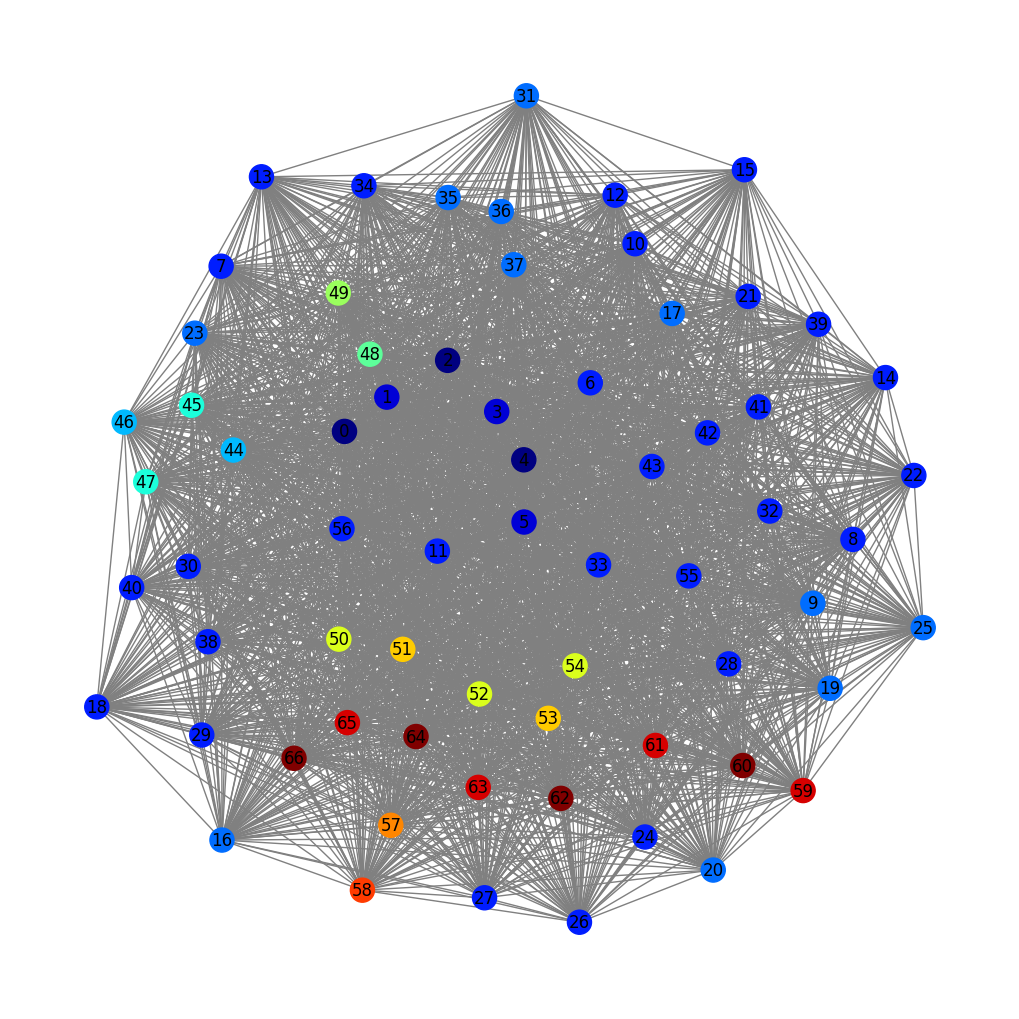

In [237]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# 创建一个图
G = nx.Graph()

# 为图添加节点
for i in range(distance_matrix.shape[0]):
    G.add_node(i)

# 为图添加边
for i in range(distance_matrix.shape[0]):
    for j in range(i+1, distance_matrix.shape[1]):
        if distance_matrix[i, j] > 0:  # 可以设置一个阈值来决定是否添加边
            G.add_edge(i, j, weight=distance_matrix[i, j])

# 获取每个节点的颜色（基于其聚类）
colors = [plt.cm.jet(x) for x in np.linspace(0, 1, len(set(clusters)))]

# 创建一个映射，将每个节点映射到其聚类索引
node_to_cluster = {node: cluster_idx for cluster_idx, cluster in enumerate(clusters) for node in cluster}

# 获取每个节点的颜色
node_colors = [colors[node_to_cluster[node]] for node in G.nodes()]


# 绘制图
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # 使用spring布局
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color="gray")
plt.show()


In [203]:
import os
import re

folder_path = 'C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_25_de_abril_publico/time/'


# 日期格式
date_pattern = re.compile(r'\d{4}-\d{2}-\d{2}')
# 所有文章的对应日期信息
data_lists = []

count = 0
for count in range(len(outputs)):
    path = folder_path + str(count) + ".txt"
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        data_list = [line.strip() for line in lines if date_pattern.match(line.strip())]
        data_list.append(dct[count])
        data_lists.append(data_list)
        
        
print(len(data_lists))        

67


    cluster  num
0         0    3
1         1    3
2         2   26
3         3    9
4         4    5
5         5    2
6         6    2
7         7    2
8         8    2
9         9    1
10       10    1
11       11    3
12       12    2
13       13    1
14       14    1
15       15    4


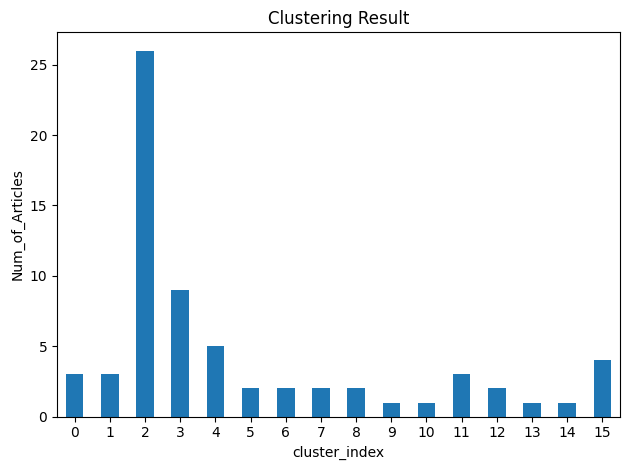

In [204]:
# 统计聚类情况
cluster_num = []
cluster_index = []
for n, cluster in enumerate(clusters):
    size = len(cluster)            
    cluster_index.append(n)
    cluster_num.append(size)
    
import pandas as pd

data = {
    'cluster': cluster_index,
    'num': cluster_num
}

df = pd.DataFrame(data)

print(df)    

df.to_csv('C:/Users/25031/Desktop/新建文件夹/dataset_pt2/_PUBLICO/A_25_de_abril_publico/SB+MCL.csv', index=False)

import pandas as pd
import matplotlib.pyplot as plt


ax = df.plot(kind='bar', x='cluster', y='num', legend=False)


# 添加标题和标签
plt.title('Clustering Result')
plt.xlabel('cluster_index')
plt.ylabel('Num_of_Articles')
plt.xticks(rotation=0)  # 设置x轴标签的旋转角度

# 显示图形
plt.tight_layout()
plt.show()


In [189]:
date_all_cluster = []

for n,cluster in enumerate(clusters):
    date_each_cluster = []
    for article_num in cluster:
        for date in data_lists[article_num]:
            date_each_cluster.append(date[0:10])
            
    # cluster的编号对应日期list        
    temp = []
    temp.append(n+1)
    temp.append(date_each_cluster)
    date_all_cluster.append(temp)
    
print(date_all_cluster[0])   
print(len(date_all_cluster))

[1, ['2020-03-16', '2020-03-16', '2020-03-15', '2020-03-16']]
79


In [190]:
from collections import Counter
# 存取每个cluster对应的出现最多的日期和次数
set_of_cluster_date = []
for data in date_all_cluster:
    key = data[0]
    value = data[1]
    counter = Counter(value)
    most_common_element, count = counter.most_common(1)[0]
    print("CLUSTER : ", key)
    print(most_common_element)  
    print(count)  
    temp = {"cluster" : key, "date" : most_common_element, "count" : count}
    set_of_cluster_date.append(temp)

CLUSTER :  1
2020-03-16
3
CLUSTER :  2
2020-03-19
3
CLUSTER :  3
2020-03-19
6
CLUSTER :  4
2020-03-19
2
CLUSTER :  5
2020-03-21
1
CLUSTER :  6
2020-03-23
5
CLUSTER :  7
2020-03-24
2
CLUSTER :  8
2020-03-24
2
CLUSTER :  9
2020-03-29
1
CLUSTER :  10
2020-04-02
3
CLUSTER :  11
2020-03-30
1
CLUSTER :  12
2020-04-06
2
CLUSTER :  13
2020-04-10
2
CLUSTER :  14
2020-04-12
2
CLUSTER :  15
2020-04-13
2
CLUSTER :  16
2020-04-15
1
CLUSTER :  17
2020-04-15
2
CLUSTER :  18
2020-04-17
2
CLUSTER :  19
2020-04-18
1
CLUSTER :  20
2020-04-20
2
CLUSTER :  21
2020-04-21
2
CLUSTER :  22
2020-05-12
2
CLUSTER :  23
2020-05-18
1
CLUSTER :  24
2020-05-20
2
CLUSTER :  25
2020-05-20
2
CLUSTER :  26
2020-05-18
1
CLUSTER :  27
2020-05-23
2
CLUSTER :  28
2020-05-28
2
CLUSTER :  29
2020-05-29
2
CLUSTER :  30
2020-05-30
1
CLUSTER :  31
2020-06-01
1
CLUSTER :  32
2021-02-02
3
CLUSTER :  33
2020-06-10
2
CLUSTER :  34
2020-06-15
3
CLUSTER :  35
2020-06-18
2
CLUSTER :  36
2020-06-24
1
CLUSTER :  37
2020-06-26
3
CLUSTER : 

In [191]:
# 按照频率进行排序
sorted_list = sorted(set_of_cluster_date, key=lambda x: x['count'], reverse=True)

for item in sorted_list:
    print(item)

{'cluster': 3, 'date': '2020-03-19', 'count': 6}
{'cluster': 6, 'date': '2020-03-23', 'count': 5}
{'cluster': 42, 'date': '2021-01-28', 'count': 4}
{'cluster': 65, 'date': '2021-02-04', 'count': 4}
{'cluster': 1, 'date': '2020-03-16', 'count': 3}
{'cluster': 2, 'date': '2020-03-19', 'count': 3}
{'cluster': 10, 'date': '2020-04-02', 'count': 3}
{'cluster': 32, 'date': '2021-02-02', 'count': 3}
{'cluster': 34, 'date': '2020-06-15', 'count': 3}
{'cluster': 37, 'date': '2020-06-26', 'count': 3}
{'cluster': 44, 'date': '2020-07-20', 'count': 3}
{'cluster': 49, 'date': '2020-10-29', 'count': 3}
{'cluster': 63, 'date': '2021-01-29', 'count': 3}
{'cluster': 67, 'date': '2021-02-09', 'count': 3}
{'cluster': 75, 'date': '2021-05-28', 'count': 3}
{'cluster': 4, 'date': '2020-03-19', 'count': 2}
{'cluster': 7, 'date': '2020-03-24', 'count': 2}
{'cluster': 8, 'date': '2020-03-24', 'count': 2}
{'cluster': 12, 'date': '2020-04-06', 'count': 2}
{'cluster': 13, 'date': '2020-04-10', 'count': 2}
{'clust

In [192]:
# 确认 gold_standard 里面有几个时间
file_path = "C:/Users/25031/Desktop/新建文件夹/dataset_pt/txt/wuhan_publico/timelines/wuhan.txt"
separator = "--------------------------------"
with open(file_path, "r", encoding='utf-8') as file:
    content = file.read()
    
content = content.replace('\n', '')
data = content.split(separator)
pro_data = []
for d in data :
    if d != '':
        pro_data.append(d[0:10])
    
print(len(pro_data))

72


In [193]:
# 对比 gold_standard 和 聚类结果
num_of_tls = len(pro_data)

cluster = sorted_list[0:num_of_tls]

Golden = []
for clus in cluster :
    Golden.append(clus["date"])

print(len(Golden))    
print(num_of_tls) 

#print(Golden)    
#print(pro_data) 

set1 = set(Golden)
set2 = set(pro_data)

# 找出相同的日期
common_elements = set1 & set2

common_num = len(common_elements)

precision = common_num/num_of_tls
recall = common_num/num_of_tls
print("Precision : ", precision)

F1_score = (2*precision*recall)/(precision+recall)
print("F1 SCORE : ", F1_score)


72
72
Precision :  0.3611111111111111
F1 SCORE :  0.3611111111111111
